In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from numpy.polynomial.polynomial import Polynomial
import pandas as pd
from pandas.plotting import parallel_coordinates

In [6]:
def get_scores_from_file(file_path): 
    scores = []
    with open(file_path, 'rb') as f:
        while True:
            try:
                scores.append(pickle.load(f))
            except EOFError:
                break
    scores
    scores = np.array(scores)
    rewards = np.array([score[0] for score in scores])
    rssi = np.array([score[1] for score in scores])
    energy = np.array([score[2] for score in scores])
    return rewards, rssi, energy

In [7]:
def plot_tradeoff(rewards, rssi, ax, color='black', marker='o', l1='', l2='', degree=3):
    interval_size = 100
    reward_intervals = np.array([(i, i + interval_size) for i in range(0, int(max(rewards)), interval_size)])

    avg_distances = []
    std_distances = []

    for interval in reward_intervals:
        # Filter distances for the current reward interval
        interval_distances = [rssi[i] for i in range(len(rewards)) if interval[0] <= rewards[i] < interval[1]]
        
        avg_distances.append(np.mean(interval_distances))
        std_distances.append(np.std(interval_distances))

    # Midpoints of reward intervals for plotting
    interval_midpoints = [(interval[0] + interval[1]) / 2 for interval in reward_intervals]

    # Plot RSSI on the primary Y-axis
    ax.scatter(interval_midpoints, avg_distances, marker=marker, color='black', label=f'RSSI avg {l1}')
    ax.fill_between(interval_midpoints, 
                    np.array(avg_distances) - np.array(std_distances), 
                    np.array(avg_distances) + np.array(std_distances), 
                    color=color, alpha=0.2, label=f'RSSI std {l2}')
    
    p = Polynomial.fit(interval_midpoints, avg_distances, degree)

    x_fit = np.linspace(min(interval_midpoints), max(interval_midpoints), 100)
    y_fit = p(x_fit)
    # ax.plot(x_fit, y_fit, color=color, linestyle='--')

In [8]:
def plot_tradeoff_scatter(rewards, rssi, ax, color='black', marker='o', l1='', l2='', degree=3):
    interval_size = 90
    reward_intervals = [(i, i + interval_size) for i in range(0, int(max(rewards)), interval_size)]
    scores = scores[scores[:, 1] < -10]

    avg_distances = []

    for interval in reward_intervals:
        # Filter distances for the current reward interval
        interval_distances = [rssi[i] for i in range(len(rewards)) if interval[0] <= rewards[i] < interval[1]]
        
        avg_distances.append(np.mean(interval_distances))

    # Midpoints of reward intervals for plotting
    interval_midpoints = [(interval[0] + interval[1]) / 2 for interval in reward_intervals]

    # Plot RSSI on the primary Y-axis
    ax.scatter(interval_midpoints, avg_distances, marker=marker, color='black', label=f'RSSI avg {l1}', s=50)
    ax.scatter(rewards, rssi, marker=marker, color=color, label=f'RSSI {l2}', s=20, alpha=0.3)

**Combined visit** for **homogeneous vehicles** (*30* runs).

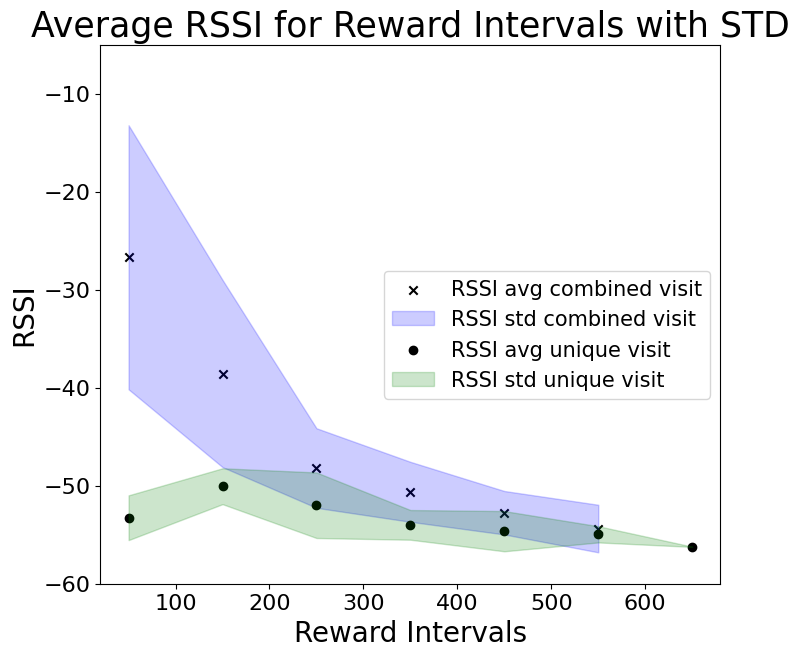

In [9]:
fig, ax = plt.subplots(figsize=(8, 7))

ax.set_xlabel('Reward Intervals', fontsize=20)
ax.set_ylabel('RSSI', fontsize=20)
ax.set_ylim(-60, -5)
ax.tick_params(axis='y', )
ax.tick_params(axis='both', labelsize=16)
ax.set_title('Average RSSI for Reward Intervals with STD', fontsize=25)

rewards, rssi, energy = get_scores_from_file("../data/combined_visit/p4.3.m/same/scores.pkl")
plot_tradeoff(rewards, rssi, ax, color='b', marker='x', l1='combined visit', l2='combined visit', degree=3)

rewards, rssi, energy = get_scores_from_file("../data/p4.3.m/4_spd/scores.pkl")
plot_tradeoff(rewards, rssi, ax, color='g', l1='unique visit', l2='unique visit', degree=1)

# rewards, rssi = get_scores_from_file("../data/p4.3.m/5_agents/scores.pkl")
# plot_tradeoff(rewards, rssi, ax, color='r', l1='het speed', l2='het speed', marker='s', degree=1)

fig.legend(loc='upper right', bbox_to_anchor=(1, 0.6), bbox_transform=ax.transAxes, fontsize=15)
plt.show()

/home/marcotuliopin/home/research/iros2025/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/marcotuliopin/home/research/iros2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/marcotuliopin/home/research/iros2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/marcotuliopin/home/research/iros2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/marcotuliopin/home/research/iros2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  

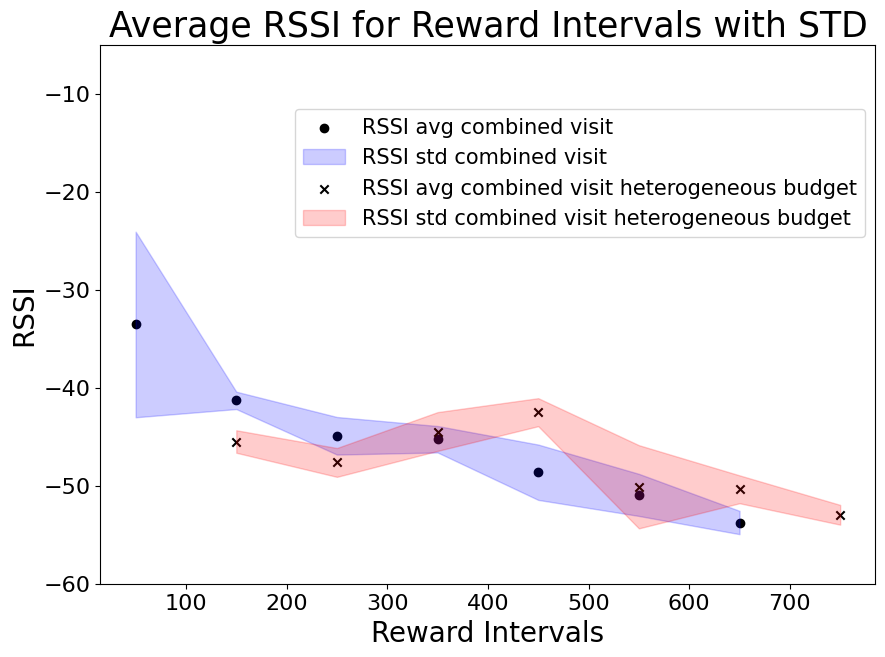

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_xlabel('Reward Intervals', fontsize=20)
ax.set_ylabel('RSSI', fontsize=20)
ax.set_ylim(-60, -5)
ax.tick_params(axis='y', )
ax.tick_params(axis='both', labelsize=16)
ax.set_title('Average RSSI for Reward Intervals with STD', fontsize=25)

rewards, rssi, energy = get_scores_from_file("../data/p3.3.t/same/scores.pkl")
plot_tradeoff(rewards, rssi, ax, color='b', marker='o', l1='combined visit', l2='combined visit', degree=3)

rewards, rssi, energy = get_scores_from_file("../data/p3.3.t/80_bgt/scores.pkl")
plot_tradeoff(rewards, rssi, ax, color='r', marker='x', l1='combined visit heterogeneous budget', l2='combined visit heterogeneous budget', degree=3)

# rewards, rssi = get_scores_from_file("../data/p3.3.t/56_bgt/scores.pkl")
# plot_tradeoff(rewards, rssi, ax, color='g', marker='d', l1='combined visit', l2='combined visit', degree=3)

fig.legend(loc='upper right', bbox_to_anchor=(1, 0.9), bbox_transform=ax.transAxes, fontsize=15)
plt.show()

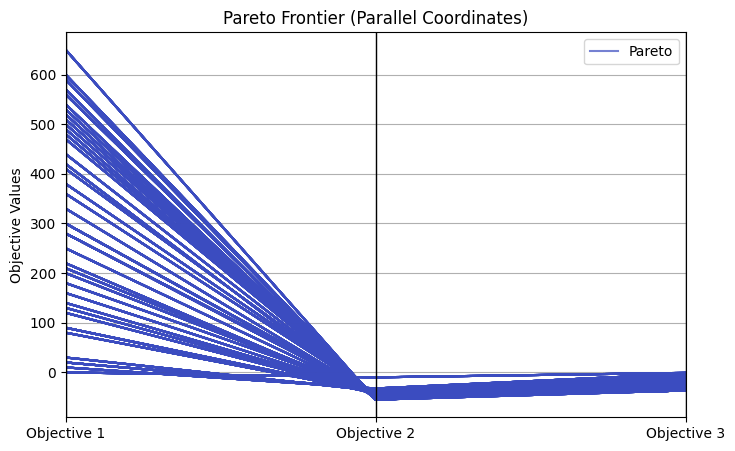

In [11]:
rewards, rssi, energy = get_scores_from_file("../data/p3.3.t/same/scores.pkl")

# Create a dataframe with objectives
df = pd.DataFrame({"Objective 1": rewards, "Objective 2": rssi, "Objective 3": energy})
df["Category"] = "Pareto"  # Dummy category for coloring

# Plot parallel coordinates
plt.figure(figsize=(8, 5))
parallel_coordinates(df, class_column="Category", colormap=plt.get_cmap("coolwarm"), alpha=0.7)
plt.ylabel("Objective Values")
plt.title("Pareto Frontier (Parallel Coordinates)")
plt.show()


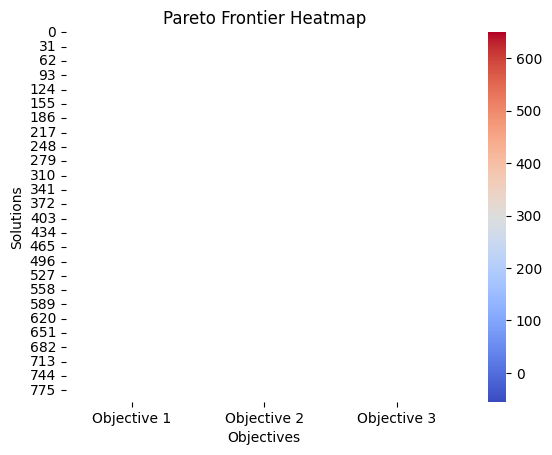

In [12]:
import seaborn as sns

df = pd.DataFrame({"Objective 1": rewards, "Objective 2": rssi, "Objective 3": energy})

sns.heatmap(df, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Pareto Frontier Heatmap")
plt.xlabel("Objectives")
plt.ylabel("Solutions")
plt.show()

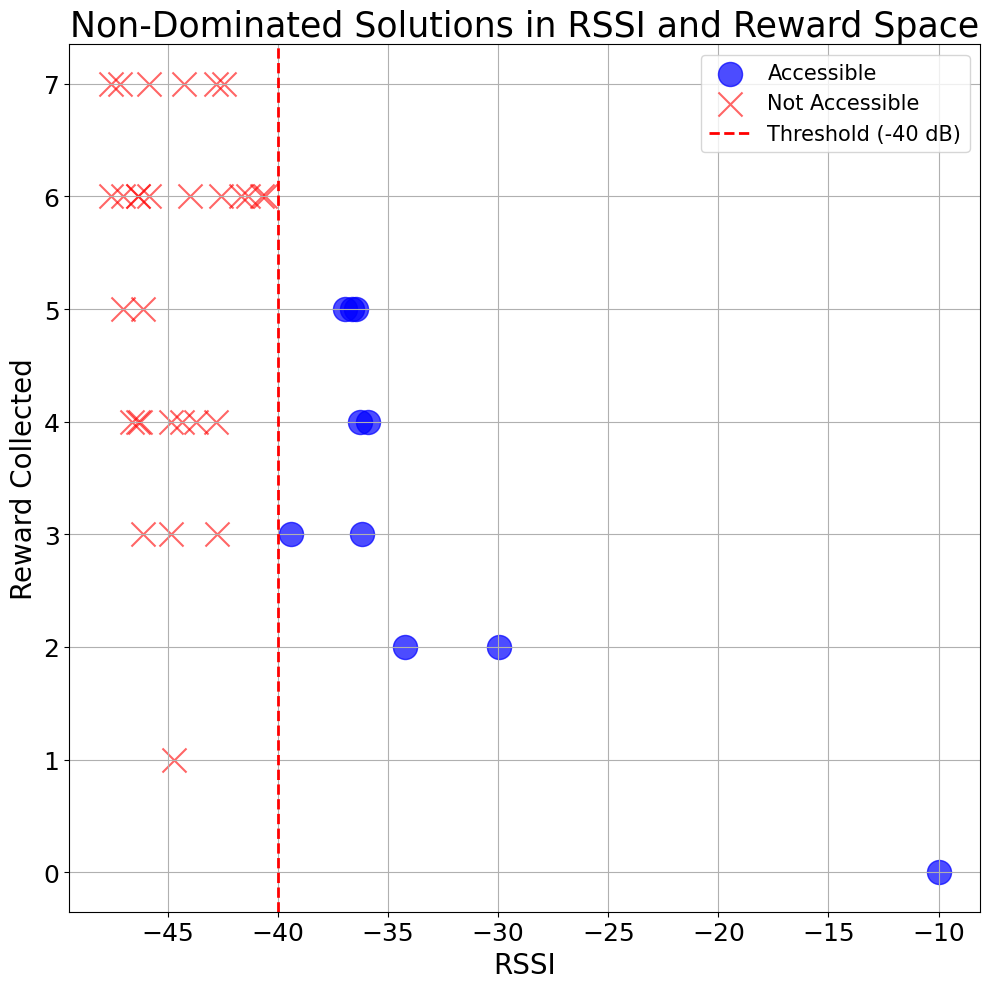

In [13]:
rewards, rssi, energy = get_scores_from_file("../data/intro/scores.pkl")

# Define the threshold
threshold = -40

# Separate points based on accessibility
accessible = rssi >= threshold
non_accessible = rssi < threshold

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot accessible points (right of the line)
ax.scatter(rssi[accessible], rewards[accessible], c='blue', alpha=0.7, s=300, label="Accessible")

# Plot non-accessible points (left of the line) with a faded look
ax.scatter(rssi[non_accessible], rewards[non_accessible], c='red', alpha=0.6, s=300, label="Not Accessible", marker="x")

# Add the vertical threshold line
ax.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label="Threshold (-40 dB)")

# Labels and formatting
ax.set_xlabel("RSSI", fontsize=20)
ax.set_ylabel("Reward Collected", fontsize=20)
plt.title("Non-Dominated Solutions in RSSI and Reward Space", fontsize=25)
ax.tick_params(axis='both', labelsize=18)
ax.grid(True)

# Legend
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()

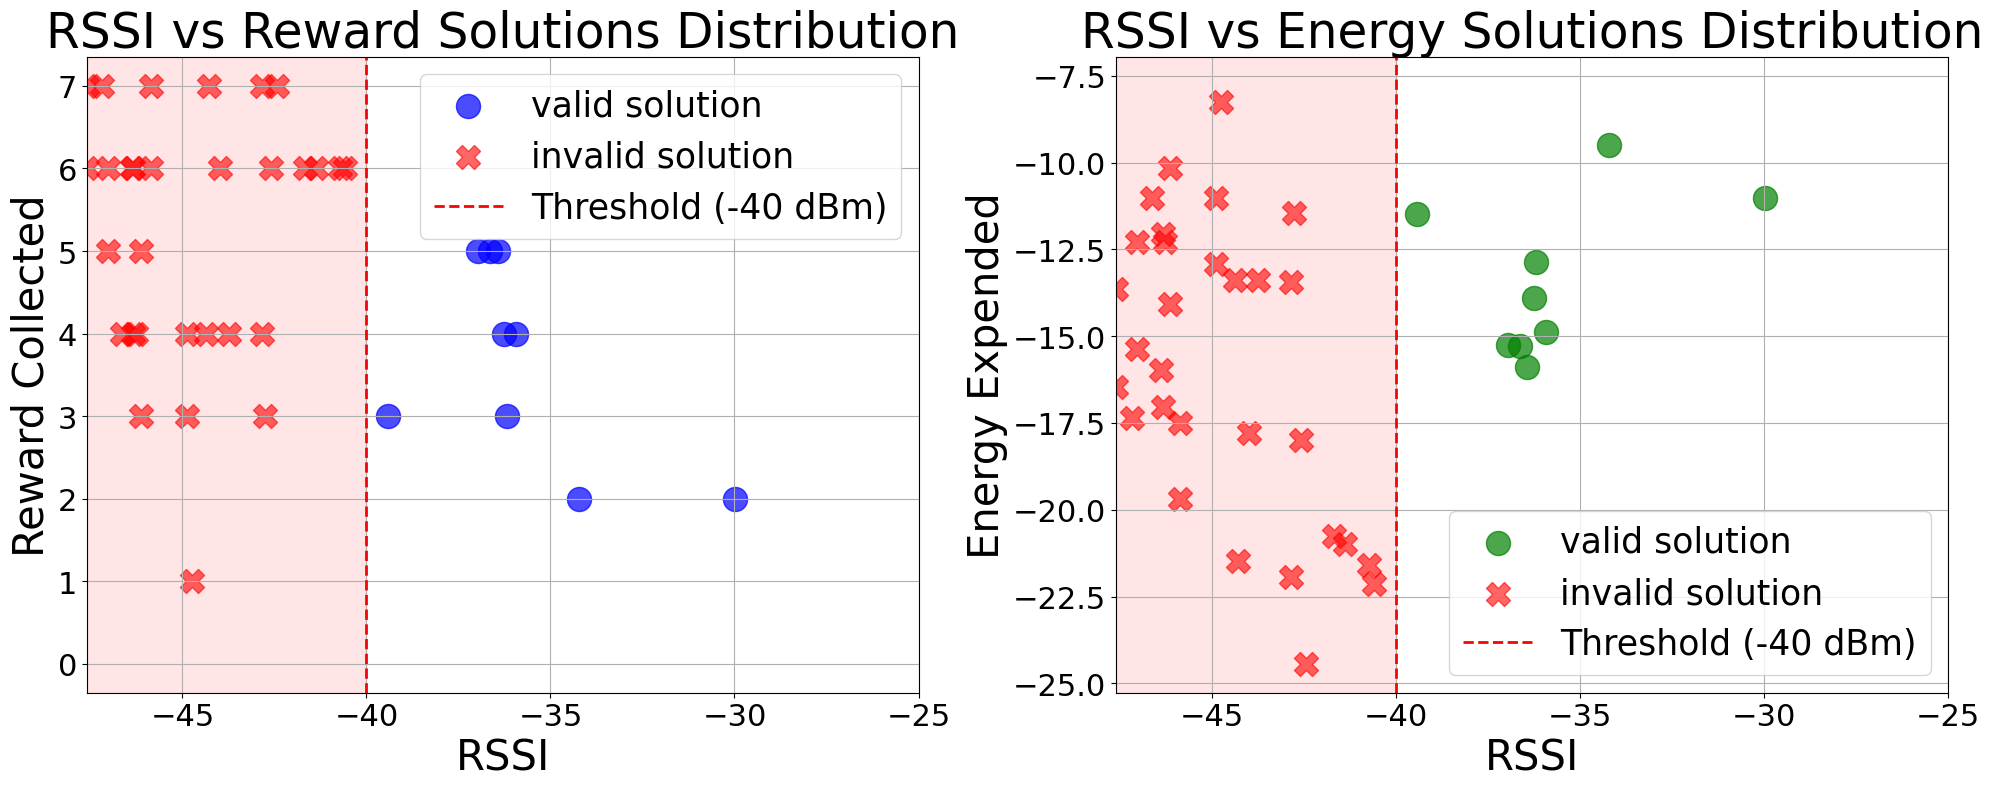

In [18]:
# Load data
rewards, rssi, energy = get_scores_from_file("../data/intro/scores.pkl")

# Define the threshold
threshold = -40

# Separate points based on accessibility
accessible = rssi >= threshold
non_accessible = rssi < threshold

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

# Labels for the subplots
titles = ["RSSI vs Reward Solutions Distribution", "RSSI vs Energy Solutions Distribution"]
y_labels = ["Reward Collected", "Energy Expended"]
y_data = [rewards, energy]
colors = ['blue', 'green']

for i, ax in enumerate(axes):
    # Plot accessible points
    ax.scatter(rssi[accessible], y_data[i][accessible], c=colors[i], alpha=0.7, s=300, label="valid solution")

    # Plot non-accessible points
    ax.scatter(rssi[non_accessible], y_data[i][non_accessible], c='red', alpha=0.6, s=300, label="invalid solution", marker="X")

    # Add the vertical threshold line
    ax.axvline(x=threshold, color='red', linestyle='--', linewidth=2, label="Threshold (-40 dBm)")
    ax.axvspan(min(rssi), threshold, color='red', alpha=0.1) 


    # Labels and formatting
    ax.set_xlabel("RSSI", fontsize=30)
    ax.set_ylabel(y_labels[i], fontsize=30)
    ax.set_title(titles[i], fontsize=35)
    ax.tick_params(axis='both', labelsize=22)
    ax.set_xlim(min(rssi), -25)
    ax.grid(True)
    ax.legend(fontsize=25)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()
